In [1]:
### Rossmann Stores Sales Problem #### Group Project - IDIS -3802 -Data Science Analysis with Python 

In [2]:
### Team members : Vincent Dsouza
###              : Abhini Zainudeen
###              : Vikram Kulkarni 



In [3]:
%matplotlib inline

In [4]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
import pandas as pd
from pandas import Series,DataFrame

In [7]:
from __future__ import print_function, division
from patsy import dmatrices, dmatrix

In [8]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [9]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [13]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [14]:
# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [15]:
# get rossmann, store, & test csv files as a DataFrame
rossmann_df  = pd.read_csv("train.csv")
store_df     = pd.read_csv("store.csv")
test_df      = pd.read_csv("test.csv")

# preview the data
rossmann_df.head()

C:\Users\SCU\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [16]:
rossmann_df.info()
print("----------------------------")
store_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 77.6+ MB
----------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-n

In [17]:
train_file = 'train.csv'
test_file = 'test.csv'
output_file ='predictions.csv'
store = 'store.csv'

In [18]:
train = pd.read_csv( train_file )
test = pd.read_csv( test_file )
store=pd.read_csv( store )

In [19]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [20]:
all_data = pd.merge(train, store, on='Store', how='left')

# clean StateHoliday column
all_data['StateHoliday'][all_data['StateHoliday'] == 0 ] = '0'

C:\Users\SCU\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
import matplotlib.pyplot as pl

C:\Users\SCU\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


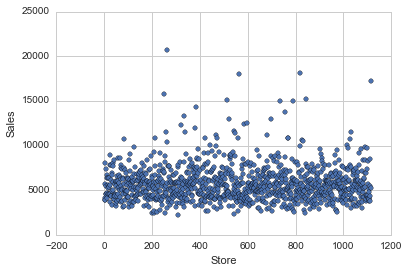

In [22]:
# count open stores by week day
#print(train.groupby(['DayOfWeek']).sum())
#print(all_data[['DayOfWeek', 'Open', 'Sales', 'Customers']].groupby(['DayOfWeek', 'Open']).agg([np.sum, np.mean, np.std]))

avg_per_store = all_data[['Sales', 'Store']].groupby('Store').mean()
avg_per_store.reset_index().plot(kind='scatter', x='Store', y='Sales')
pl.savefig('avg_per_store.reset.index.png')

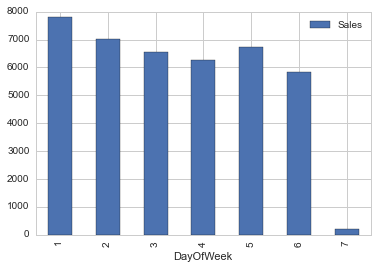

In [23]:
# More sales on Monday and followed by Tuesday
# average sales and customers by week day
avg_per_weekday = all_data[['Sales', 'DayOfWeek']].groupby('DayOfWeek').mean()
avg_per_weekday.reset_index().plot(kind='bar', x='DayOfWeek', y='Sales')
pl.savefig('avg_per_weekday.reset.index.png')

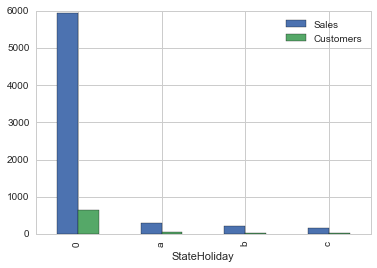

In [24]:
# State holidays is not driving much of sales incomparision to Promotion
avg_stateholiday = all_data[['Sales', 'Customers', 'StateHoliday']].groupby('StateHoliday').mean()
avg_stateholiday.plot(kind='bar')
pl.savefig('avg_stateholiday.png')

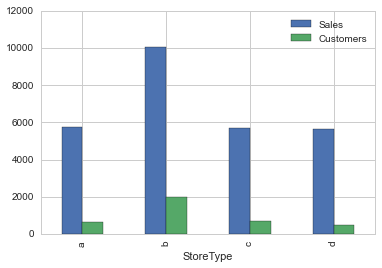

In [25]:
#Store type b had higher average sales than other store types
avg_stateholiday = all_data[['Sales', 'Customers', 'StoreType']].groupby('StoreType').mean()
avg_stateholiday.plot(kind='bar')
pl.savefig('avg_stateholiday.png')

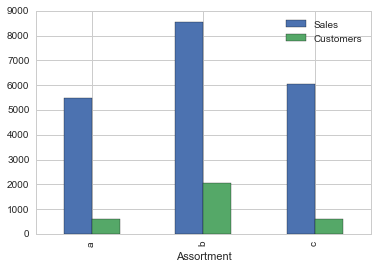

In [26]:
# Assortment level b was driving most of the sales for the stores 
avg_stateholiday = all_data[['Sales', 'Customers', 'Assortment']].groupby('Assortment').mean()
avg_stateholiday.plot(kind='bar')
pl.savefig('avg_stateholiday.png')

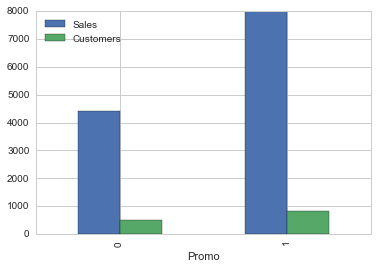

In [27]:
#Promotion is not bringing in new customers but is encouraging customers to spend more
avg_promotion = all_data[['Sales', 'Customers', 'Promo']].groupby('Promo').mean()
avg_promotion.plot(kind='bar')
pl.savefig('avg_promotion.png')

In [28]:
## remove rows where store were closed
train = train.loc[train.Sales > 0]

In [29]:
# remove NaNs from Open
test.loc[ test.Open.isnull(), 'Open' ] = 1

In [30]:
columns = ['Store', 'DayOfWeek', 'Promo']

In [31]:
medians = train.groupby( columns )['Sales'].median()
medians = medians.reset_index()

In [32]:
test2 = pd.merge( test, medians, on = columns, how = 'left' )
assert( len( test2 ) == len( test ))

In [33]:
test2.loc[ test2.Open == 0, 'Sales' ] = 0
assert( test2.Sales.isnull().sum() == 0 )

In [34]:
test2[[ 'Id', 'Sales' ]].to_csv( output_file, index = False )

In [35]:
# Date

# Create Year and Month columns
rossmann_df['Year']  = rossmann_df['Date'].apply(lambda x: int(str(x)[:4]))
rossmann_df['Month'] = rossmann_df['Date'].apply(lambda x: int(str(x)[5:7]))

test_df['Year']  = test_df['Date'].apply(lambda x: int(str(x)[:4]))
test_df['Month'] = test_df['Date'].apply(lambda x: int(str(x)[5:7]))

In [36]:
# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
# this column will be useful in analysis and visualization
rossmann_df['Date'] = rossmann_df['Date'].apply(lambda x: (str(x)[:7]))
test_df['Date']     = test_df['Date'].apply(lambda x: (str(x)[:7]))

In [37]:
# group by date and get average sales, and precent change
average_sales    = rossmann_df.groupby('Date')["Sales"].mean()
pct_change_sales = rossmann_df.groupby('Date')["Sales"].sum().pct_change()

In [38]:
# StateHoliday

# StateHoliday column has values 0 & "0", So, we need to merge values with 0 to "0"
rossmann_df["StateHoliday"].loc[rossmann_df["StateHoliday"] == 0] = "0"
# test_df["StateHoliday"].loc[test_df["StateHoliday"] == 0] = "0"



C:\Users\SCU\Anaconda2\lib\site-packages\pandas\core\indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [39]:
# StateHoliday

# After
rossmann_df["StateHoliday"] = rossmann_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
test_df["StateHoliday"]     = test_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})



In [40]:
# Using store_df

# Merge store_df with average store sales & customers
average_sales_customers = rossmann_df.groupby('Store')[["Sales", "Customers"]].mean()
sales_customers_df = DataFrame({'Store':average_sales_customers.index,
                      'Sales':average_sales_customers["Sales"], 'Customers': average_sales_customers["Customers"]}, 
                      columns=['Store', 'Sales', 'Customers'])
store_df = pd.merge(sales_customers_df, store_df, on='Store')

store_df.head()

,Store,Sales,Customers,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,3945.704883,467.646497,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,4122.991507,486.045648,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5741.253715,620.286624,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,8021.769639,1100.057325,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,3867.110403,444.360934,a,a,29910,4,2015,0,NaN,NaN,NaN


In [41]:
# CompetitionDistance

# fill NaN values
store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median())

0        1270
1         570
2       14130
3         620
4       29910
5         310
6       24000
7        7520
8        2030
9        3160
10        960
11       1070
12        310
13       1300
14       4110
15       3270
16         50
17      13840
18       3240
19       2340
20        550
21       1040
22       4060
23       4590
24        430
25       2300
26         60
27       1200
28       2170
29         40
        ...  
1085      180
1086     2210
1087     4300
1088     5220
1089      330
1090     9990
1091      300
1092    10450
1093     2380
1094      690
1095     1130
1096      720
1097     1830
1098      200
1099      540
1100     4060
1101      850
1102     1340
1103      260
1104      330
1105     5330
1106     1400
1107      540
1108     3490
1109      900
1110     1900
1111     1880
1112     9260
1113      870
1114     5350
Name: CompetitionDistance, dtype: float64

In [42]:
from sklearn.metrics import r2_score

In [43]:
# Correlation
# Visualize the Correlation between stores

store_piv       = pd.pivot_table(rossmann_df,values='Sales', index='Date', columns=['Store'],aggfunc='sum')
store_pct_chage = store_piv.pct_change().dropna()
store_piv.head()

Store,1,2,3,4,5,6,7,8,9,10,...,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115
Date,,,,,,,,,,,,,,,,,,,,,
2013-01,128431,115171,165653,234713,109442,152265,188032,122293,127016,130042,...,115116,143763,143571,119190,106800,128626,304489,155879,456530,116482
2013-02,125271,111114,160167,230473,101126,139655,178830,119828,126826,122956,...,107923,140576,127544,115328,99489,122822,301544,147817,446745,123114
2013-03,145169,130525,189179,255514,116860,162550,213082,135408,143583,133609,...,124035,170060,148065,124393,116539,138298,312362,171412,516987,155033
2013-04,118009,116878,172188,226981,106141,154269,197381,127236,136194,131040,...,110478,154915,132135,118303,106745,131652,284870,148796,497336,126212
2013-05,118225,116379,170374,235284,110292,157972,210921,126886,136540,130642,...,111092,151585,131119,117329,105277,128784,284762,155649,503359,131329


In [44]:
###Below is Linear Regression 

In [45]:
# We only use 2015 for prediction 

# drop Year and Month
rossmann_df.drop(["Year", "Month"], axis=1, inplace=True)
test_df.drop(["Year", "Month"], axis=1, inplace=True)

# Create dummy varibles for DayOfWeek
day_dummies_rossmann  = pd.get_dummies(rossmann_df['DayOfWeek'], prefix='Day')
day_dummies_rossmann.drop(['Day_7'], axis=1, inplace=True)

day_dummies_test  = pd.get_dummies(test_df['DayOfWeek'],prefix='Day')
day_dummies_test.drop(['Day_7'], axis=1, inplace=True)

rossmann_df = rossmann_df.join(day_dummies_rossmann)
test_df     = test_df.join(day_dummies_test)

rossmann_df.drop(['DayOfWeek'], axis=1,inplace=True)
test_df.drop(['DayOfWeek'], axis=1,inplace=True)

In [46]:
# remove all rows(store,date) that were closed
rossmann_df = rossmann_df[rossmann_df["Open"] != 0]

# drop unnecessary columns, these columns won't be useful in prediction
rossmann_df.drop(["Open","Customers", "Date"], axis=1, inplace=True)

In [47]:
# save ids of closed stores,and will assign their sales value to 0 later
closed_store_ids = test_df["Id"][test_df["Open"] == 0].values

# remove all rows(store,date) that were closed
test_df = test_df[test_df["Open"] != 0]

# drop unnecessary columns, these columns won't be useful in prediction
test_df.drop(['Open', 'Date'], axis=1,inplace=True)

In [48]:
# Loop through each store, 
# train the model using the data of current store, and predict it's sales values. Using Linear Regression 

rossmann_dic = dict(list(rossmann_df.groupby('Store')))
test_dic     = dict(list(test_df.groupby('Store')))
submission   = Series()
scores       = []

for i in test_dic:
    
    # current store
    store = rossmann_dic[i]
    
    # define training and testing sets
    X_train = store.drop(["Sales","Store"],axis=1)
    Y_train = store["Sales"]
    X_test  = test_dic[i].copy()
    
    store_ids = X_test["Id"]
    X_test.drop(["Id","Store"], axis=1,inplace=True)
    
    # Linear Regression
    lreg = LinearRegression()
    lreg.fit(X_train, Y_train)
    Y_pred = lreg.predict(X_test)
    scores.append(lreg.score(X_train, Y_train))
    

    #reg.summary()
    #Equation coefficient and Intercept
    #print('Coefficient: \n', lreg.coef_)
   # print('Intercept: \n', lreg.intercept_)

        
    # append predicted values of current store to submission
    submission = submission.append(Series(Y_pred, index=store_ids))

# append rows(store,date) that were closed, and assign their sales value to 0
submission = submission.append(Series(0, index=closed_store_ids))

# save to csv file
submission = pd.DataFrame({ "Id": submission.index, "Sales": submission.values})
submission.to_csv('regnrossn.csv', index=False)

In [49]:
print(X_train.shape)

(781, 9)


In [50]:
print (Y_train.shape)

(781L,)


In [51]:
print (X_test.shape)

(41, 9)


In [52]:
print (Y_pred.shape)

(41L,)


In [53]:
### Coefficient of determination of R2

print (lreg.score(X_train, Y_train))

0.44869486979


In [54]:
import time
import sys
from datetime import date, datetime

In [55]:
#Import sales, store
sales = pd.read_csv('train.csv', dtype={'StateHoliday': np.character})
stores = pd.read_csv('store.csv')

print("Sales shape: %s --> columns: %s" % (sales.shape, ", ".join(sales.columns)))
print("Store shape: %s --> columns: %s" % (stores.shape, ", ".join(stores.columns)))

Sales shape: (1017209, 9) --> columns: Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday
Store shape: (1115, 10) --> columns: Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval


In [56]:

df = pd.merge(sales, stores, on='Store')
#print "Sales & Store joined shape: %s" % (sf.shape, )

df['Open'] = df['Open'].apply(lambda x: 0 if np.isnan(x) else x)

df['has_sales'] = df['Sales'].apply(lambda x: x > 0)
df['has_customers'] = df['Customers'].apply(lambda x: x != 0)

date_format = '%d/%m/%Y'
if '-' in df.at[0, 'Date']:
    date_format = '%Y-%m-%d'

    #temporary column that have the date parsed in order to speed up further processing
    df['_date'] = df['Date'].apply(lambda x: datetime.strptime(x, date_format))

    df['month'] = df['_date'].apply(lambda x: x.month)
    df['week_of_month'] = df['_date'].apply(lambda x: x.isocalendar()[1])
    df['year'] = df['_date'].apply(lambda x: x.isocalendar()[0])

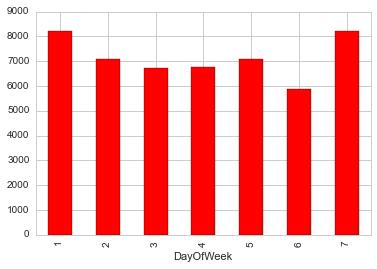

In [57]:
data = df[(df['Sales']!=0)].groupby(['DayOfWeek']).Sales.mean()
data.plot('bar',color='red')

In [58]:
## The above plot is mean of Sales as per day of Week

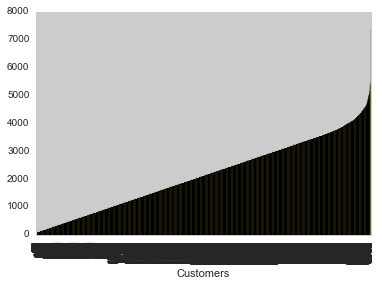

In [59]:
data = df[(df['Sales']!=0)].groupby(['Customers']).Customers.mean()
data.plot('bar',color='yellow')

In [60]:
### Trying out Random Forest Algorithm 

In [61]:
#### use of sklearn -- RandomForest Regressors

In [62]:
import pandas as pd
import numpy as np
import sklearn.externals.joblib as jl

import sklearn.cross_validation as cv
import sklearn.feature_extraction as fe

In [63]:
import sklearn.svm as svm

import matplotlib.pyplot as plt

import sklearn.linear_model as lm

import sklearn.preprocessing as preprocessing

import sklearn.ensemble as es

In [64]:

store = pd.read_csv('store.csv')
train = pd.read_csv('train.csv',low_memory=False)
test = pd.read_csv('test.csv')

In [65]:
df_train = train.copy()
df_test = test.copy()

In [66]:
## Merge store
df_train = pd.merge(train,store,on='Store')
df_test = pd.merge(test,store,on='Store')

In [67]:
sale_means = train.groupby('Store').mean().Sales
sale_means.name = 'Sales_Means'

df_train = df_train.join(sale_means,on='Store')
df_test = df_test.join(sale_means,on='Store')

In [68]:
y = df_train.Sales.tolist()

df_train_ = df_train.drop(['Date','Sales','Store','Customers'],axis=1).fillna(0)



train_dic = df_train_.fillna(0).to_dict('records')


test_dic = df_test.drop(["Date","Store","Id"],axis=1).fillna(0).to_dict('records')

In [69]:
#transfrom dataframe to matrix by dict vectorizer
dv = fe.DictVectorizer()
X = dv.fit_transform(train_dic)
Xo = dv.transform(test_dic)

In [70]:
#MIN_MAX SCALER
maxmin = preprocessing.MinMaxScaler()
X = maxmin.fit_transform(X.toarray())
Xo = maxmin.transform(Xo.toarray())

In [71]:
Xtrain,Xtest,Ytrain,Ytest = cv.train_test_split(X,y)

In [72]:
clf = es.RandomForestRegressor(n_estimators=50)
clf.verbose = True
clf.n_jobs = 8
clf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=8, oob_score=False, random_state=None,
           verbose=True, warm_start=False)

In [73]:
clf.fit(Xtrain,Ytrain)
print ("Training Score :" + str(clf.score(Xtrain,Ytrain)))
print ("Test Score : " + str(clf.score(Xtest,Ytest)) )

[Parallel(n_jobs=8)]: Done   1 out of  50 | elapsed:   10.1s remaining:  8.4min
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:  1.1min finished
[Parallel(n_jobs=8)]: Done   1 out of  50 | elapsed:    0.2s remaining:   14.5s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    1.7s finished
[Parallel(n_jobs=8)]: Done   1 out of  11 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.5s finished


Training Score :0.921791089074
Test Score : 0.916074579524


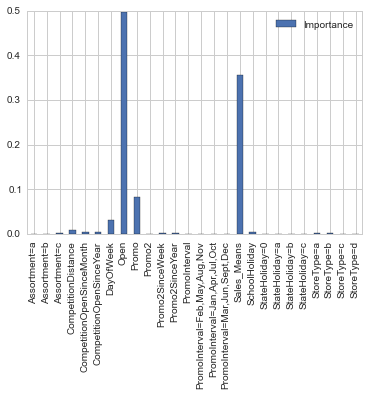

In [74]:
u = [i for i in zip(dv.feature_names_,clf.feature_importances_) ]

u = pd.DataFrame(u,columns = ['Feature_Names','Importance'],index=dv.feature_names_)

u.plot(kind='bar',layout='Feature_Names')

In [75]:
result = clf.predict(Xo)

[Parallel(n_jobs=8)]: Done   1 out of  50 | elapsed:    0.0s remaining:    0.7s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


In [76]:
Yresult = clf.predict(Xtest)


[Parallel(n_jobs=8)]: Done   1 out of  50 | elapsed:    0.0s remaining:    4.3s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.5s finished


In [77]:
print (Yresult)

[ 3680.05073954     0.          9052.26045218 ...,  8918.06042795     0.
  5558.62773668]


In [78]:
output = pd.DataFrame(df_test.Id).join(pd.DataFrame(result,columns=['Sales']))

In [79]:
output.to_csv('randoutputx.csv',index=False)

In [80]:
#### References : http://Kaggle.com
####            : http://blog.yhathq.com
####            : http://www.analyticsvidhya.com
####            : http://machinelearningmastery.com